In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [26]:
df_usa = df[df['job_country'] == 'United States'].copy()

In [27]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

In [28]:
df_usa.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [29]:
df_usa_pivot = df_usa.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size',
)

In [30]:
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month', inplace=True)
df_usa_pivot.drop(columns='month_no', inplace=True) 

In [31]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

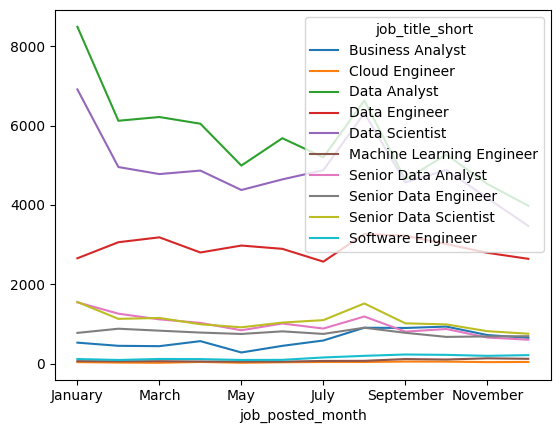

In [32]:
df_usa_pivot.plot(kind='line')

In [39]:
top_3 = df_usa['job_title_short'].value_counts().head(3)

top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

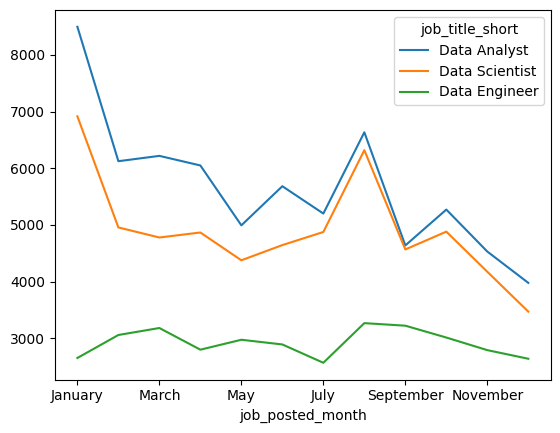

In [43]:
df_usa_pivot[top_3].plot(kind='line')